In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
arr = np.load('fit_exercise.npy')
arr

array([[ 0.59677897,  0.9210494 ,  1.15618395,  1.75451756,  1.8249173 ,
         2.26851454,  2.28263231,  2.50455365,  2.86139335,  2.93714046,
         3.12261223,  3.17285482,  3.22958914,  3.43178016,  3.61788656,
         3.92117518,  3.98044255,  4.14826212,  4.2310646 ,  4.2583029 ,
         4.26351307,  4.30862763,  4.33701173,  4.38572245,  4.80931901,
         4.83034264,  4.93685098,  5.01836676,  5.19485119,  5.31551374,
         5.31827587,  5.51314769,  6.11023511,  6.12894526,  6.23952952,
         6.30976124,  6.34400959,  6.84829739,  6.96469186,  7.1946897 ,
         7.22443383,  7.24455325,  7.29049707,  7.37995406,  8.49431794,
         8.66309158,  8.93389163,  9.44160018,  9.80764198,  9.85559786],
       [ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
         3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
         1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
         1.00444563, -0.02239716,  0.35714018,  0.

In [4]:
arr[0]


array([0.59677897, 0.9210494 , 1.15618395, 1.75451756, 1.8249173 ,
       2.26851454, 2.28263231, 2.50455365, 2.86139335, 2.93714046,
       3.12261223, 3.17285482, 3.22958914, 3.43178016, 3.61788656,
       3.92117518, 3.98044255, 4.14826212, 4.2310646 , 4.2583029 ,
       4.26351307, 4.30862763, 4.33701173, 4.38572245, 4.80931901,
       4.83034264, 4.93685098, 5.01836676, 5.19485119, 5.31551374,
       5.31827587, 5.51314769, 6.11023511, 6.12894526, 6.23952952,
       6.30976124, 6.34400959, 6.84829739, 6.96469186, 7.1946897 ,
       7.22443383, 7.24455325, 7.29049707, 7.37995406, 8.49431794,
       8.66309158, 8.93389163, 9.44160018, 9.80764198, 9.85559786])

In [5]:
arr[1]

array([ 8.11257148,  3.52815075,  4.81023356,  0.89238164,  3.13295195,
        3.53338034,  1.89933975,  2.83896349,  0.89713921,  0.9500022 ,
        1.45700044,  1.05318568,  1.71011605,  0.06780647,  0.40019114,
        1.00444563, -0.02239716,  0.35714018,  0.36639252, -0.20377166,
        0.4535501 , -0.05481938,  0.11108328,  0.05408497, -0.4312348 ,
        0.03066613,  0.04872262, -0.60437665, -0.92605578, -1.43906426,
        0.05799768, -2.19399769, -2.19477287, -2.07585727, -1.99984962,
       -1.01857516, -0.14032142, -2.42545494, -1.27448771, -2.09526812,
       -2.14633492, -3.37270574, -4.11273068, -3.72061886, -4.85942793,
       -3.4872956 , -2.6354799 , -4.70700707, -6.73600298, -0.44957541])

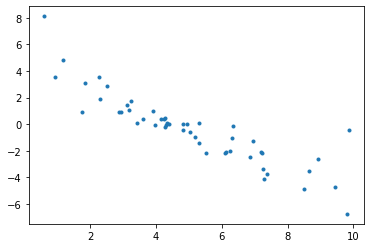

In [6]:
plt.plot(arr[0], arr[1], 'o', label='Original data', markersize=3)

In [7]:
# Fit a line, y = px + b, through some noisy data-points
A = np.vstack([arr[0], np.ones(len(arr[0]))]).T
p, b = np.linalg.lstsq(A, arr[1], rcond=None)[0]
p, b


(-0.9821623517930426, 4.57785930375336)

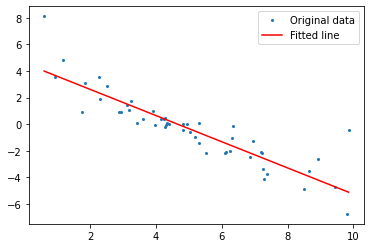

In [8]:
plt.plot(arr[0], arr[1], 'o', label='Original data', markersize=2)
plt.plot(arr[0], p*arr[0] + b, 'r', label='Fitted line')
plt.legend()
plt.show()

## Debemos calcumar 
## $m=\sum x\sum y -n\sum xy/((\sum x)^{2}-n\sum x^{2})=\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$
## $k=\sum y -m\sum x /(n)=\bar{y}-m\bar{x}$

In [9]:
n=len(arr[0])
print(n)

x_mean=np.mean(arr[0])
y_mean=np.mean(arr[1]) 
a = (arr[0] - x_mean)*(arr[1] - y_mean)
c = a.sum()
d = (arr[0]-x_mean)**2
e = d.sum()

m= c / e 

k = y_mean - m*x_mean

50


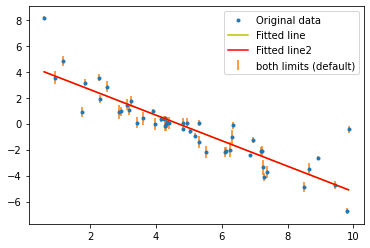

In [10]:
import matplotlib.pyplot as plt
plt.plot(arr[0], arr[1], 'o', label='Original data', markersize=3)
plt.errorbar(arr[0], arr[1],yerr= arr[2],ls='',label='both limits (default)')
plt.plot(arr[0], p*arr[0] + b, 'y', label='Fitted line')
plt.plot(arr[0], m*arr[0] + k, 'r', label='Fitted line2')
plt.legend()
plt.show()

In [11]:
from scipy.stats import chisquare

obs = np.array([arr[0], arr[1]]).T
chisquare(obs)

#Returns
#chisqfloat or ndarray
#The chi-squared test statistic. The value is a float if axis is None or f_obs and f_exp are 1-D.

#pfloat or ndarray
#The p-value of the test. The value is a float if ddof and the return value chisq are scalars.



Power_divergenceResult(statistic=array([  53.84445406, -942.86633315]), pvalue=array([0.29426089, 1.        ]))

In [12]:
chisquare(arr[0])

Power_divergenceResult(statistic=53.84445405603419, pvalue=0.29426088903807196)